In [13]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import LagrangeSystem, S

system = (
    LagrangeSystem()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
system._equations

{}

In [16]:
from mechanics.integrator import *
system_d = (
    system.discretization()
    .add_constant('N h')
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(BackwardEuler('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equations: 4, unknowns: 6, definitions: 7
Jacobian: [(0, 0), (1, 2), (2, 4), (2, 5), (3, 1), (3, 3)]
def definitions_generated(N, h, m, g, l, i, theta, dottheta, ddottheta, k_dottheta, k_ddottheta, t, x, y, T, U, L, E):
  t[i] = i*h  # {BackwardEuler}_{\dot{\theta}} 
  x[i] = l*numpy.sin(theta[i])  # {BackwardEuler}_{\dot{\theta}} 
  y[i] = -l*numpy.cos(theta[i])  # {BackwardEuler}_{\dot{\theta}} 
  T[i] = (1/2)*dottheta[i]**2*l**2*m  # {BackwardEuler}_{\dot{\theta}} 
  U[i] = g*m*y[i]  # {BackwardEuler}_{\dot{\theta}} 
  L[i] = T[i] - U[i]  # {BackwardEuler}_{\dot{\theta}} 
  E[i] = T[i] + U[i]  # {BackwardEuler}_{\dot{\theta}} 
  pass

def equations_generated(N, h, m, g, l, i, theta, dottheta, ddottheta, k_dottheta, k_ddottheta, _):
  _[0] = dottheta[i] - k_dottheta[i]  # State_{{k_{\dot{\theta}}}} 
  _[1] = -g*l*m*numpy.sin(theta[i]) - l**2*m*k_ddottheta[i]  # {EL}_{K} 
  _[2] = -theta[i] + theta[i + 1] - h*k_dottheta[i + 1]  # {BackwardEuler}_{\theta} 
  _[3] = -dottheta[i] + dotth

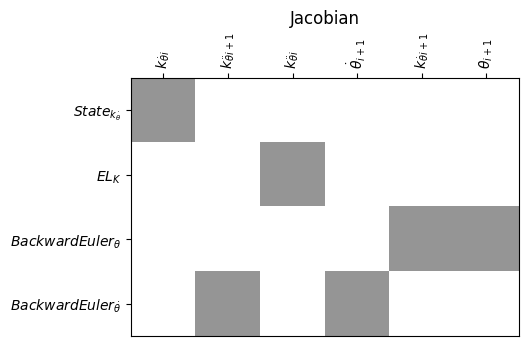

<IPython.core.display.Math object>

In [153]:
solver = system_d.solver()
solver.plot_jacobian()
solver.print_jacobian()

In [135]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 1000,
    'h': 0.1,
    'theta': np.pi/4,
    'dottheta': 0,
})
# result.newton_converged_iters

i = 0, ..., 1000


100%|██████████| 1001/1001 [00:00<00:00, 9632.12it/s]


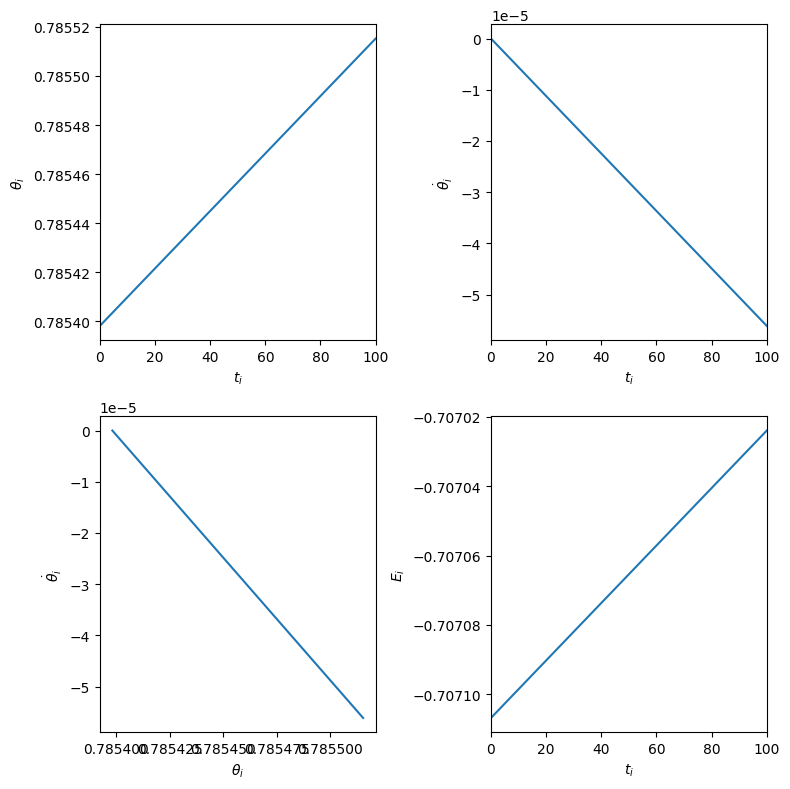

In [136]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('dottheta')
axes[2].plot('theta', 'dottheta')
axes[3].plot('E')